## IBM HR Analytics Employee Attrition & Performance

This is a fictitious dataset created by IBM data scientists. This dataset is intended for research purposes and uncovering factors that lead to employee attrition or building machine learning models to predict employee attrition.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('hr_data.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No missing values

Purpose:
1. Discover the factors that affect employee attrition and then take measures to reduce this rate.

2. Build a machine learning model based on employee factors to predict whether that employee is likely to attrition or not?

In [6]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

No duplicated rows

Use select_dtypes method to list columns of type numerical and category

In [7]:
cat_coulmns = df.select_dtypes(['object']).columns
num_coulmns = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [8]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [9]:
cat_cols = list(set(df.columns) - set(df._get_numeric_data())) 
# set(): 去重，转化为集合，（集合数据不能修改）输出字典型；list(): 转化为队列
for col in cat_cols:
    print(col, ': ', set(df[col]))

OverTime :  {'Yes', 'No'}
Over18 :  {'Y'}
Gender :  {'Male', 'Female'}
Attrition :  {'Yes', 'No'}
Department :  {'Research & Development', 'Human Resources', 'Sales'}
EducationField :  {'Life Sciences', 'Other', 'Human Resources', 'Marketing', 'Medical', 'Technical Degree'}
MaritalStatus :  {'Single', 'Married', 'Divorced'}
BusinessTravel :  {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
JobRole :  {'Research Scientist', 'Sales Executive', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Sales Representative', 'Healthcare Representative', 'Research Director', 'Human Resources'}


## EDA

<Axes: xlabel='Attrition', ylabel='count'>

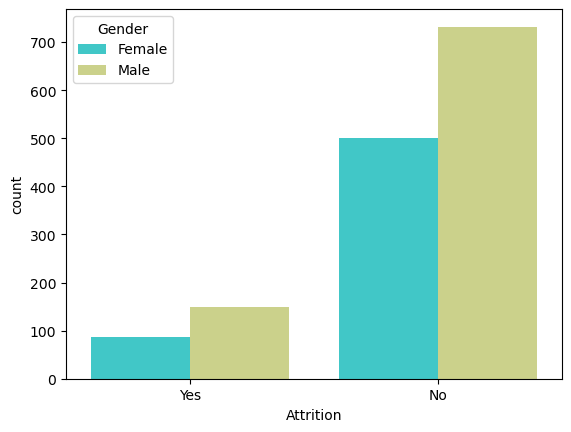

In [10]:
sns.countplot(x='Attrition', data=df, palette='rainbow', hue='Gender')

<Axes: xlabel='Attrition', ylabel='count'>

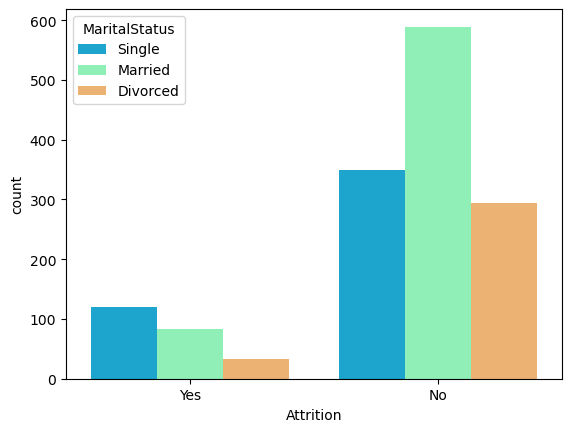

In [11]:
sns.countplot(x='Attrition', data=df, palette='rainbow', hue='MaritalStatus')

<Axes: title={'center': 'Distribution of Job Level'}, xlabel='JobLevel', ylabel='count'>

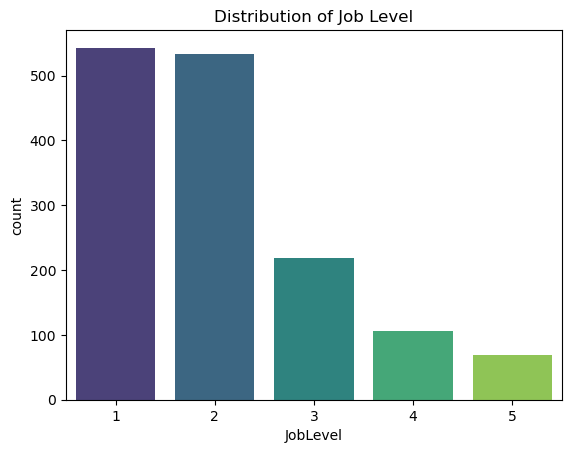

In [12]:
plt.title('Distribution of Job Level')
sns.countplot(x='JobLevel', data=df, palette='viridis')

<Axes: xlabel='JobLevel', ylabel='MonthlyIncome'>

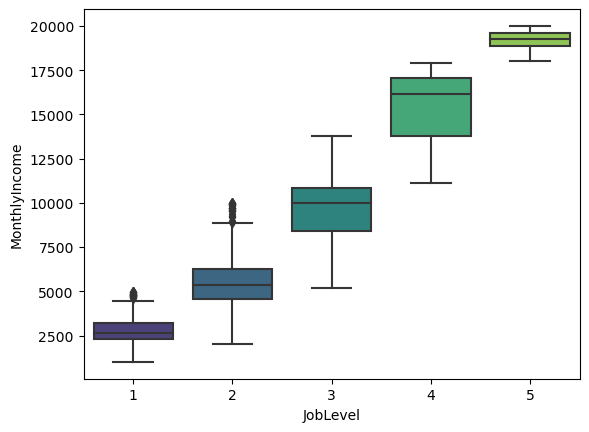

In [13]:
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df, palette='viridis')

<Axes: xlabel='JobLevel', ylabel='MonthlyIncome'>

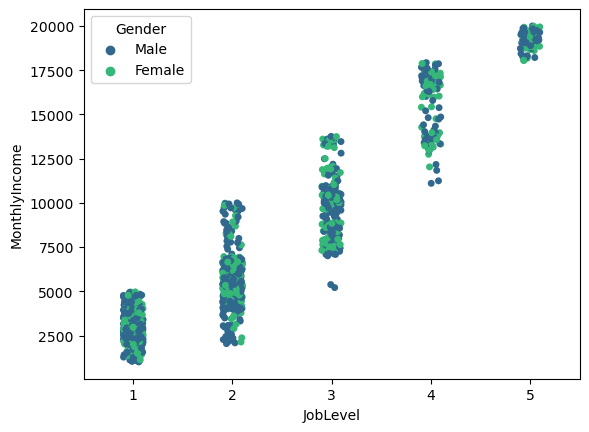

In [14]:
sns.stripplot(x='JobLevel', y='MonthlyIncome', data=df, palette='viridis', hue='Gender')

## Data Preprocessing

In [15]:
categorical = df[cat_coulmns]
categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


one-hot vector: https://blog.csdn.net/yeshang_lady/article/details/103940513

In [16]:
numerical = df[num_coulmns]
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


### Encoding

1. convert category attributes with only 2 distinct values to numeric: Attrition, Gender, OverTime
2. encode attributes with more than 2 value types: JobRole, EducationField, MaritalStatus, Department, BusinessTravel

In [17]:
df_copy = df.copy()

In [18]:
df_copy = pd.get_dummies(df_copy, columns=['Attrition', 'Gender', 'OverTime', 'Over18'], drop_first=True)
# everyone in IBM is over 18, so this variable doesn't matter

In [19]:
df_copy = pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])
df_copy.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

All variables changed into int type

### Pick up metrics

Eliminate the attributes that do not make sense for the problem

In [21]:
df_copy.corr()['Attrition_Yes'].sort_values()

TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.134392
JobInvolvement                      -0.130016
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
MaritalStatus_Divorced              -0.087716
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
JobRole_Manufacturing Director      -0.082994
JobRole_Healthcare Representative   -0.078696
BusinessTravel_Non-Travel           -0.074457
WorkLifeBalance                     -0.063939
TrainingTimesLastYear               -0.059478
DailyRate                         

**EmployeeCount** and **StandardHours** has no attribute to Attrition_Yes

In [22]:
df_copy.drop('EmployeeCount', axis=1, inplace=True)
df_copy.drop('StandardHours', axis=1, inplace=True)

Using correlations between independent variables:

The higher the correlation between the two independent variables, the more similar information they bring to the context of the problem.
Therefore, when two independent variables have high correlation, one can be selected to apply to model training.

In [23]:
correlations= df_copy.corr()

In [24]:
threshold=0.8
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,JobLevel,MonthlyIncome,0.950300
1,Department_Human Resources,JobRole_Human Resources,0.904983
2,Department_Sales,JobRole_Sales Executive,0.808869


In [25]:
df_copy.drop(['MonthlyIncome', 'JobRole_Human Resources', 'JobRole_Sales Executive'], axis=1, inplace=True)

In [26]:
df_copy.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,0,0,0,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,7,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


In [27]:
df_copy.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

No missing values, ready to go!

In [47]:
X = df_copy.drop('Attrition_Yes', axis=1)
y = df_copy['Attrition_Yes']

In [49]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [137]:
# 有标签，用LDA降维而不是PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_std, y)

https://zhuanlan.zhihu.com/p/166865253

## Model Building

### Logistics Regression

In [99]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y,
                                                    test_size=0.3, random_state=101)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [141]:
pred = lr.predict(X_test)

In [142]:
from sklearn.metrics import classification_report, confusion_matrix

In [143]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.46      0.57        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.75       441
weighted avg       0.88      0.89      0.88       441



In [144]:
print(confusion_matrix(y_test, pred))

[[360  11]
 [ 38  32]]


In [145]:
from sklearn import metrics

In [146]:
metrics.mean_squared_error(y_test, pred)

0.1111111111111111

**Accuracy: 0.89** 

## LDA

In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [151]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda.fit(X_train, y_train)
pred2 = lda.predict(X_test)

In [152]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.46      0.57        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.75       441
weighted avg       0.88      0.89      0.88       441



In [153]:
print(confusion_matrix(y_test, pred2))

[[360  11]
 [ 38  32]]


In [154]:
metrics.mean_squared_error(y_test, pred2)

0.1111111111111111

**Accuracy: 0.89**

## QDA

In [305]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
pred3 = qda.predict(X_test)

/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [306]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       371
           1       0.29      0.47      0.36        70

    accuracy                           0.73       441
   macro avg       0.59      0.63      0.59       441
weighted avg       0.79      0.73      0.75       441



In [307]:
metrics.mean_squared_error(y_test, pred2)

0.12018140589569161

**Accuracy: 0.73**

## LightGBM

It is not advisable to use LGBM on small datasets. LightGBM is sensitive to overfitting and can easily overfit small data.

In [73]:
import lightgbm as lgb
error_rate = []
for i in range(150, 200, 1):
    clf_i = lgb.LGBMClassifier(learning_rate= 1, max_depth = 10,n_estimators = i)
    clf_i.fit(X_train, y_train)
    pred_i = clf_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

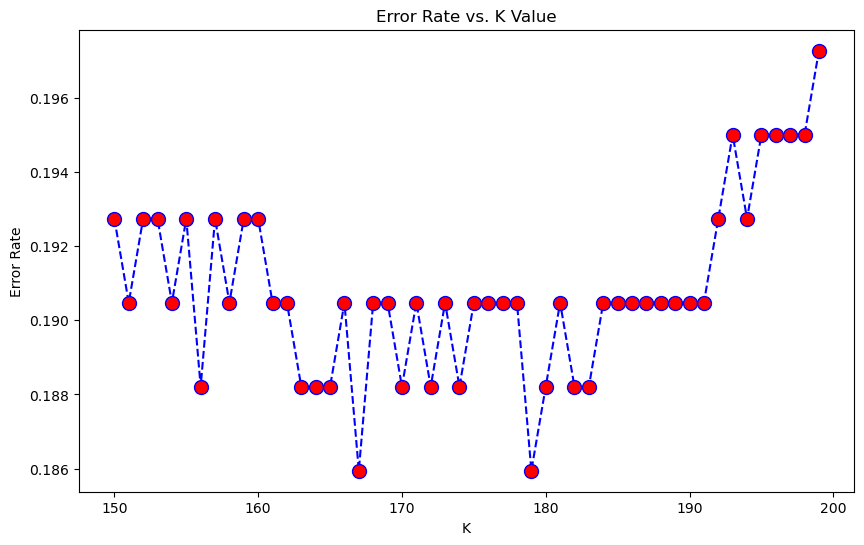

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(150, 200), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# 175

In [147]:
clf = lgb.LGBMClassifier(learning_rate= 0.1, max_depth = 10,n_estimators = 195)
clf.fit(X_train, y_train)
pred4 = clf.predict(X_test)

In [148]:
pred4 = clf.predict(X_test)

In [149]:
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       371
           1       0.65      0.44      0.53        70

    accuracy                           0.87       441
   macro avg       0.77      0.70      0.73       441
weighted avg       0.86      0.87      0.86       441



In [150]:
metrics.mean_squared_error(y_test, pred4)

0.12698412698412698

## SVM

In [69]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [70]:
pred5 = svc.predict(X_test)

In [71]:
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       371
           1       0.55      0.09      0.15        70

    accuracy                           0.84       441
   macro avg       0.70      0.54      0.53       441
weighted avg       0.80      0.84      0.79       441



In [72]:
metrics.mean_squared_error(y_test, pred5)

0.1564625850340136

模型选择：https://www.sohu.com/a/336415741_411876